📄 Dataset shape: (539, 31)
🧾 First 5 rows:
        0      1      2      3      4      5      6      7      8      9  ...  \
0    0.0    0.0    0.0  -20.0  112.0  120.0  248.0  -72.0 -212.0    4.0  ...   
1  -20.0  112.0  120.0  248.0  -72.0 -212.0    4.0  -36.0    4.0 -268.0  ...   
2  248.0  -72.0 -212.0    4.0  -36.0    4.0 -268.0  164.0 -148.0 -352.0  ...   
3    4.0  -36.0    4.0 -268.0  164.0 -148.0 -352.0   12.0  -20.0 -296.0  ...   
4 -268.0  164.0 -148.0 -352.0   12.0  -20.0 -296.0 -160.0 -564.0  808.0  ...   

      21     22      23     24     25      26      27     28      29   label  
0  808.0 -200.0  -408.0 -836.0  560.0 -1100.0  -320.0  296.0  -796.0  normal  
1 -836.0  560.0 -1100.0 -320.0  296.0  -796.0   208.0 -540.0   -52.0  normal  
2 -320.0  296.0  -796.0  208.0 -540.0   -52.0  -624.0  216.0  -608.0  normal  
3  208.0 -540.0   -52.0 -624.0  216.0  -608.0  -496.0   76.0 -1168.0  normal  
4 -624.0  216.0  -608.0 -496.0   76.0 -1168.0 -6168.0 -196.0 -5636.0  normal  



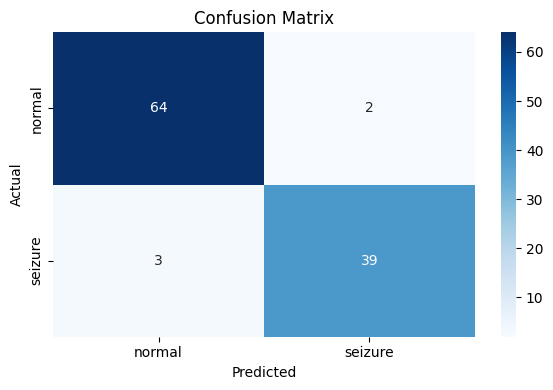

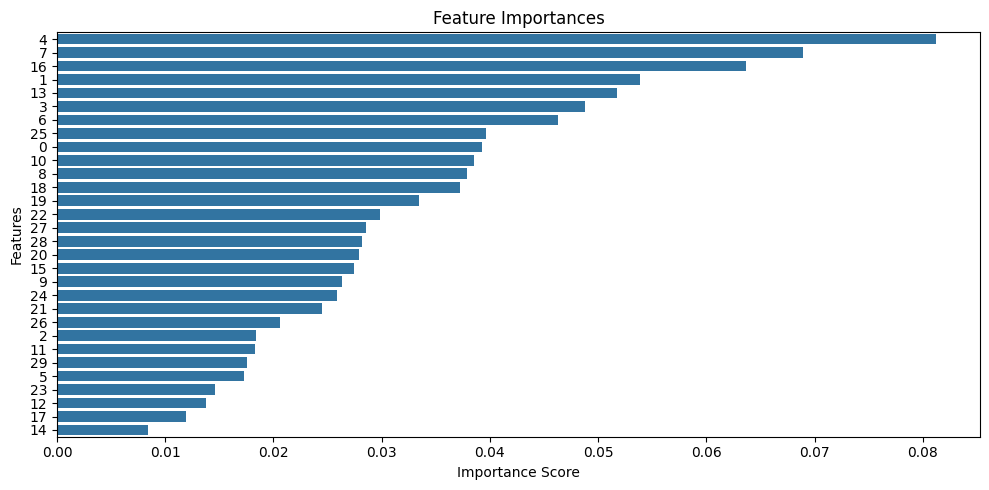

<ipython-input-2-e0c0959872fc>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='Set2')


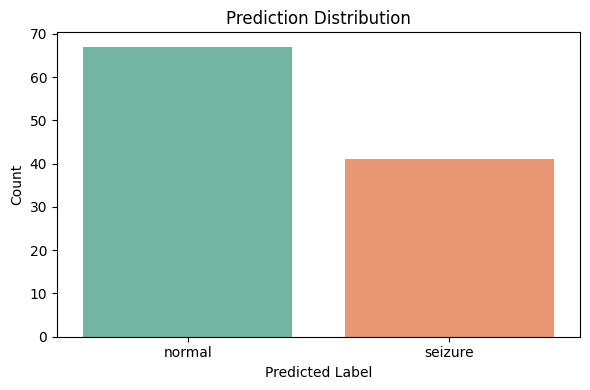

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)

# Load dataset
df = pd.read_csv('final_dataset.csv')

# Display basic info
print("📄 Dataset shape:", df.shape)
print("🧾 First 5 rows:\n", df.head())

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Encode labels (e.g., "normal" → 0, "seizure" → 1)
y_encoded = y.astype('category').cat.codes
label_mapping = dict(enumerate(y.astype('category').cat.categories))
print("\n🔢 Label Mapping:", label_mapping)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability for ROC

# -------------------- 🔍 Evaluation Metrics --------------------
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=label_mapping.values()))
print("\n🌀 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------- 🔥 Confusion Matrix Heatmap --------------------
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------- 💡 Feature Importance --------------------
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# -------------------- 📈 Prediction Distribution --------------------
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette='Set2')
plt.title("Prediction Distribution")
plt.xticks(ticks=np.arange(len(label_mapping)), labels=label_mapping.values())
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
!pip install micromlgen
from micromlgen import port

# Export the trained model
c_code = port(clf)

# Save to a header file
with open("model.h", "w") as f:
    f.write(c_code)


  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=8bdd585206911423a605af407a1b4edcf62956b5eb3fe5c8974c2729b1ed7289
  Stored in directory: /root/.cache/pip/wheels/aa/3a/19/9fd4635f110202e18f3b4bb631e90287ba06eb406999726cb9
Successfully built micromlgen
